# Task 1

Create a function to rename DataFrame columns using dict_names.  
Summarize cleaned data and annotate observations (e.g., outliers, variability). 

**Inputs**: df, dict_names  
**Outputs**: renamed_df, summary notes 

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
# Create a function to rename the DataFrame columns
def rename_col (df, dict_names):
    return df.rename(columns=dict_names)

In [5]:
# Import the dataframe
df = pd.read_csv('breast_cancer.csv')
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [6]:
# Create the dictionary dict_names to later use it in the rename_col function
dict_names = dict(zip(df.columns, df.columns.str.replace(" ", "_")))

renamed_df = rename_col(df, dict_names)
renamed_df.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,mean_fractal_dimension,...,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [7]:
# See if any of the columns has any NAN values
renamed_df.isna().sum()

mean_radius                0
mean_texture               0
mean_perimeter             0
mean_area                  0
mean_smoothness            0
mean_compactness           0
mean_concavity             0
mean_concave_points        0
mean_symmetry              0
mean_fractal_dimension     0
radius_error               0
texture_error              0
perimeter_error            0
area_error                 0
smoothness_error           0
compactness_error          0
concavity_error            0
concave_points_error       0
symmetry_error             0
fractal_dimension_error    0
worst_radius               0
worst_texture              0
worst_perimeter            0
worst_area                 0
worst_smoothness           0
worst_compactness          0
worst_concavity            0
worst_concave_points       0
worst_symmetry             0
worst_fractal_dimension    0
diagnosis                  0
dtype: int64

In [7]:
# Create a function to remove outliers, using the IQR
def remove_outliers_iqr(df, cols=None, k=1.5):
    if cols is None:
        cols = df.select_dtypes(include="number").columns
    
    df_clean = df.copy()
    for c in cols:
        q1 = df_clean[c].quantile(0.25)
        q3 = df_clean[c].quantile(0.75)
        iqr = q3 - q1
        lower = q1 - k * iqr
        upper = q3 + k * iqr
        df_clean = df_clean[(df_clean[c] >= lower) & (df_clean[c] <= upper)]
    return df_clean

renamed_df = remove_outliers_iqr(renamed_df)

In [20]:
# Use the pandas function describe to get a quick calculation of the descriptive statistics of each column of the clean dataframe
renamed_df.describe(include='all')

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,mean_fractal_dimension,...,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension,diagnosis
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


# Task 2

- Create scatterplots for two variables 
grouped by category.

In [36]:
plt.style.use('ggplot')

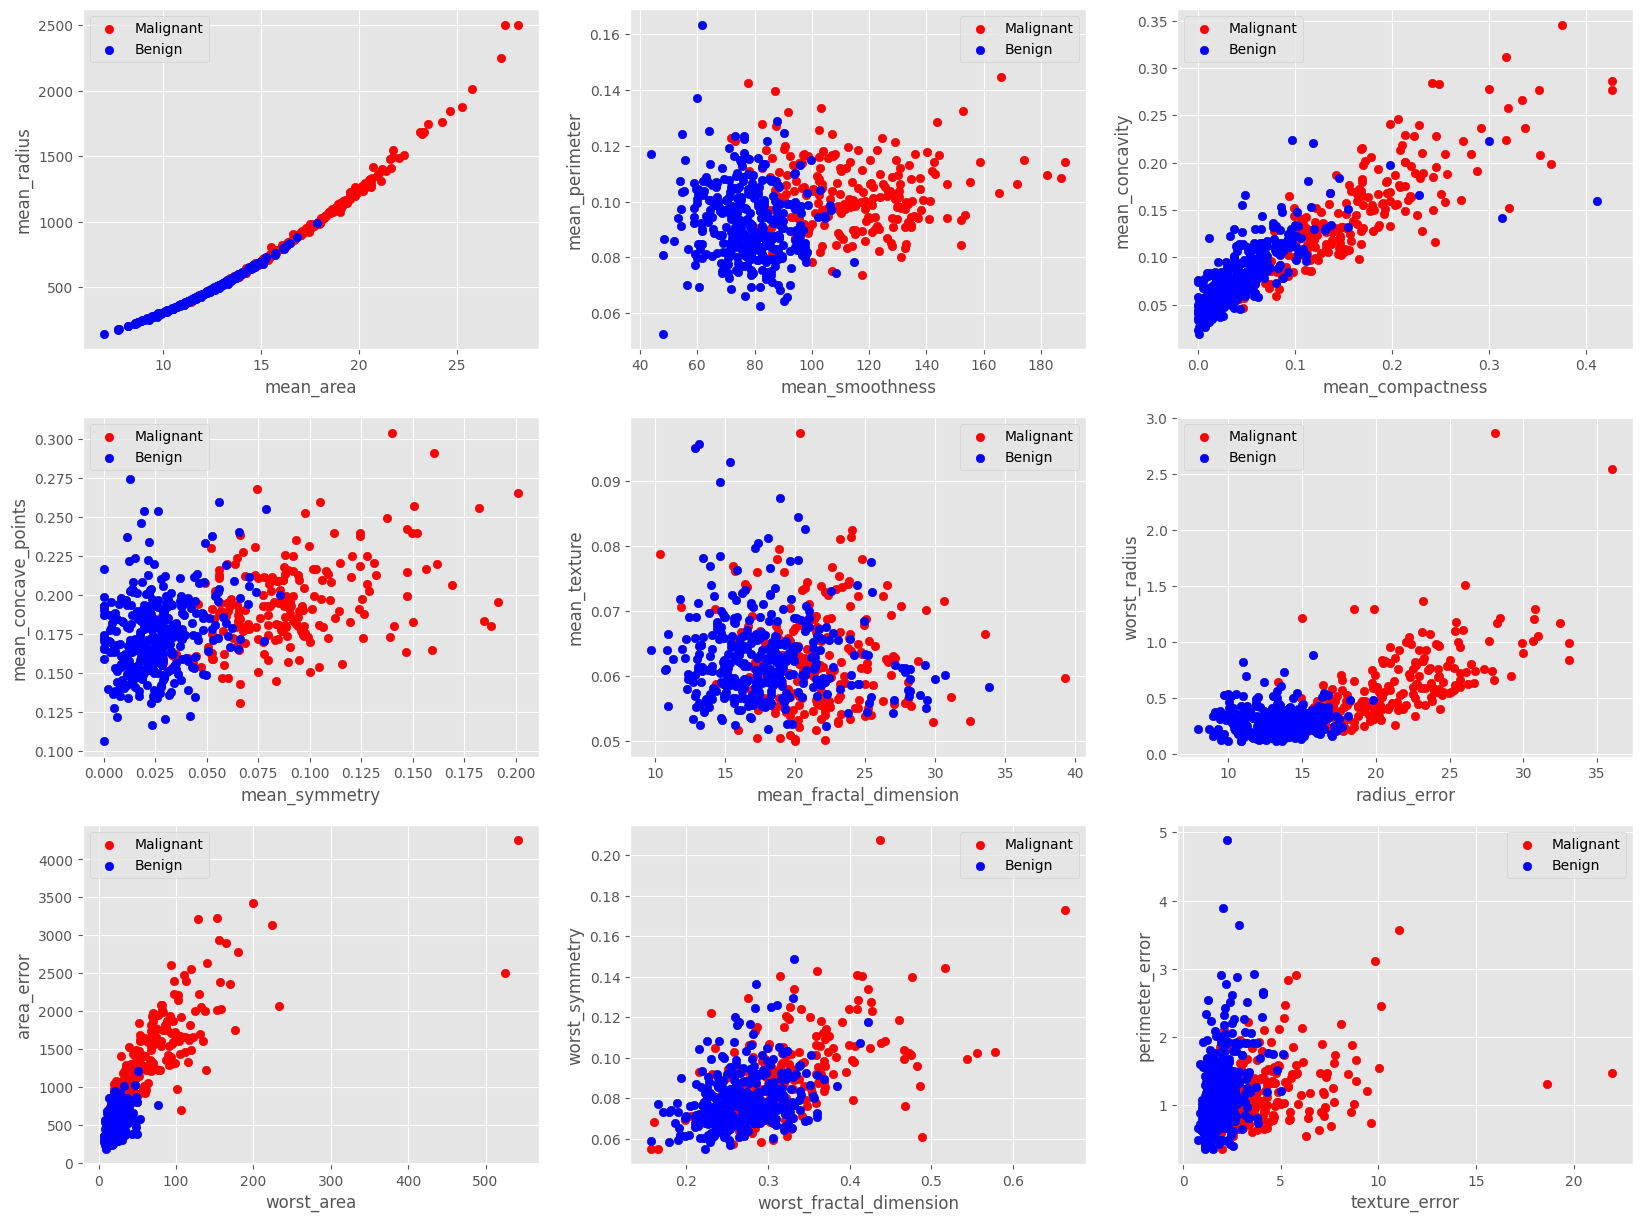

In [52]:
fig, axs = plt.subplots(3, 3,figsize=(20,15))
axs[0,0].scatter(renamed_df.mean_radius[renamed_df.diagnosis == 0], renamed_df.mean_area[renamed_df.diagnosis == 0], color = 'red' , label = 'Malignant')
axs[0,0].scatter(renamed_df.mean_radius[renamed_df.diagnosis == 1], renamed_df.mean_area[renamed_df.diagnosis == 1], color = 'blue' , label = 'Benign')
axs[0,0].set_ylabel('mean_radius')
axs[0,0].set_xlabel('mean_area')
axs[0,0].legend()

axs[0,1].scatter(renamed_df.mean_perimeter[renamed_df.diagnosis == 0], renamed_df.mean_smoothness[renamed_df.diagnosis == 0], color = 'red' , label = 'Malignant')
axs[0,1].scatter(renamed_df.mean_perimeter[renamed_df.diagnosis == 1], renamed_df.mean_smoothness[renamed_df.diagnosis == 1], color = 'blue' , label = 'Benign')
axs[0,1].set_ylabel('mean_perimeter')
axs[0,1].set_xlabel('mean_smoothness')
axs[0,1].legend()

axs[0,2].scatter(renamed_df.mean_concavity[renamed_df.diagnosis == 0], renamed_df.mean_compactness[renamed_df.diagnosis == 0], color = 'red' , label = 'Malignant')
axs[0,2].scatter(renamed_df.mean_concavity[renamed_df.diagnosis == 1], renamed_df.mean_compactness[renamed_df.diagnosis == 1], color = 'blue' , label = 'Benign')
axs[0,2].set_ylabel('mean_concavity')
axs[0,2].set_xlabel('mean_compactness')
axs[0,2].legend()


axs[1,0].scatter(renamed_df.mean_concave_points[renamed_df.diagnosis == 0], renamed_df.mean_symmetry[renamed_df.diagnosis == 0], color = 'red' , label = 'Malignant')
axs[1,0].scatter(renamed_df.mean_concave_points[renamed_df.diagnosis == 1], renamed_df.mean_symmetry[renamed_df.diagnosis == 1], color = 'blue' , label = 'Benign')
axs[1,0].set_ylabel('mean_concave_points')
axs[1,0].set_xlabel('mean_symmetry')
axs[1,0].legend()

axs[1,1].scatter(renamed_df.mean_texture[renamed_df.diagnosis == 0], renamed_df.mean_fractal_dimension[renamed_df.diagnosis == 0], color = 'red' , label = 'Malignant')
axs[1,1].scatter(renamed_df.mean_texture[renamed_df.diagnosis == 1], renamed_df.mean_fractal_dimension[renamed_df.diagnosis == 1], color = 'blue' , label = 'Benign')
axs[1,1].set_ylabel('mean_texture')
axs[1,1].set_xlabel('mean_fractal_dimension')
axs[1,1].legend()

axs[1,2].scatter(renamed_df.worst_radius[renamed_df.diagnosis == 0], renamed_df.radius_error[renamed_df.diagnosis == 0], color = 'red' , label = 'Malignant')
axs[1,2].scatter(renamed_df.worst_radius[renamed_df.diagnosis == 1], renamed_df.radius_error[renamed_df.diagnosis == 1], color = 'blue' , label = 'Benign')
axs[1,2].set_ylabel('worst_radius')
axs[1,2].set_xlabel('radius_error')
axs[1,2].legend()

axs[2,0].scatter(renamed_df.area_error[renamed_df.diagnosis == 0], renamed_df.worst_area[renamed_df.diagnosis == 0], color = 'red' , label = 'Malignant')
axs[2,0].scatter(renamed_df.area_error[renamed_df.diagnosis == 1], renamed_df.worst_area[renamed_df.diagnosis == 1], color = 'blue' , label = 'Benign')
axs[2,0].set_ylabel('area_error')
axs[2,0].set_xlabel('worst_area')
axs[2,0].legend()

axs[2,1].scatter(renamed_df.worst_symmetry[renamed_df.diagnosis == 0], renamed_df.worst_fractal_dimension[renamed_df.diagnosis == 0], color = 'red' , label = 'Malignant')
axs[2,1].scatter(renamed_df.worst_symmetry[renamed_df.diagnosis == 1], renamed_df.worst_fractal_dimension[renamed_df.diagnosis == 1], color = 'blue' , label = 'Benign')
axs[2,1].set_ylabel('worst_symmetry')
axs[2,1].set_xlabel('worst_fractal_dimension')
axs[2,1].legend()

axs[2,2].scatter(renamed_df.perimeter_error[renamed_df.diagnosis == 0], renamed_df.texture_error[renamed_df.diagnosis == 0], color = 'red' , label = 'Malignant')
axs[2,2].scatter(renamed_df.perimeter_error[renamed_df.diagnosis == 1], renamed_df.texture_error[renamed_df.diagnosis == 1], color = 'blue' , label = 'Benign')
axs[2,2].set_ylabel('perimeter_error')
axs[2,2].set_xlabel('texture_error')
axs[2,2].legend()

plt.show()

The features that seem more useful to predict diagnosis are: 
- *mean_radius*, 
- *mean_area*, 
- *mean_compactness*,
- *mean_smoothness*, 
- and *mean_symmetry*.